<a href="https://colab.research.google.com/github/albinjohn366/2012_Election_Poll_Analysis/blob/main/Election_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import pandas as pd
import numpy as np
from datetime import datetime

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

We are importing data from a website named huffpost pollster. We will use the string to retrieve the data.

In [193]:
import requests
from io import StringIO

In [194]:
url = 'https://elections.huffingtonpost.com/pollster/api/v2/questions/12-US-Pres-GE%20RvO/poll-responses-clean.tsv'
source = requests.get(url).text
data = pd.read_csv(StringIO(source), sep='\t')
data.head()

,Obama,Romney,Undecided,Other,poll_slug,survey_house,start_date,end_date,question_text,sample_subpopulation,observations,margin_of_error,mode,partisanship,partisan_affiliation
0,47.0,47.0,6.0,NaN,politico-gwu-battleground-16674,Politico/GWU/Battleground,2012-11-04,2012-11-05,NaN,Likely Voters,1000.0,3.1,Live Phone,Nonpartisan,None
1,49.0,47.0,3.0,NaN,yougov-economist-16733,YouGov/Economist,2012-11-03,2012-11-05,NaN,Likely Voters,740.0,NaN,Internet,Nonpartisan,None
2,48.0,48.0,4.0,NaN,gravis-marketing-16681,Gravis Marketing,2012-11-03,2012-11-05,NaN,Likely Voters,872.0,3.3,Automated Phone,Nonpartisan,None
3,50.0,49.0,NaN,1.0,ibd-tipp-16679,IBD/TIPP,2012-11-03,2012-11-05,NaN,Likely Voters,712.0,3.7,Live Phone,Nonpartisan,None
4,48.0,49.0,NaN,NaN,rasmussen-16677,Rasmussen,2012-11-03,2012-11-05,NaN,Likely Voters,1500.0,3.0,Automated Phone,Nonpartisan,None


In [195]:
poll_data = data.copy()
poll_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Obama                 1045 non-null   float64
 1   Romney                1045 non-null   float64
 2   Undecided             535 non-null    float64
 3   Other                 281 non-null    float64
 4   poll_slug             1045 non-null   object 
 5   survey_house          1045 non-null   object 
 6   start_date            1045 non-null   object 
 7   end_date              1045 non-null   object 
 8   question_text         0 non-null      float64
 9   sample_subpopulation  1045 non-null   object 
 10  observations          1021 non-null   float64
 11  margin_of_error       809 non-null    float64
 12  mode                  1045 non-null   object 
 13  partisanship          1045 non-null   object 
 14  partisan_affiliation  1045 non-null   object 
dtypes: float64(7), object

We could see that question_text column is of no use as it is null

In [196]:
poll_data.drop(columns=['question_text'], inplace=True)

Now let us visualize to see which among these had affiliations

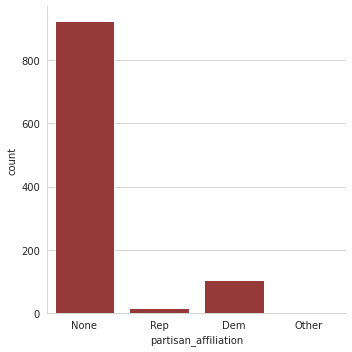

In [197]:
sns.catplot(data=poll_data, x='partisan_affiliation', kind='count', color='brown')

Here one can observe that more number of polls had affiliations to Democratic than Republic.

Now let us see the same in terms of kind of population in the area

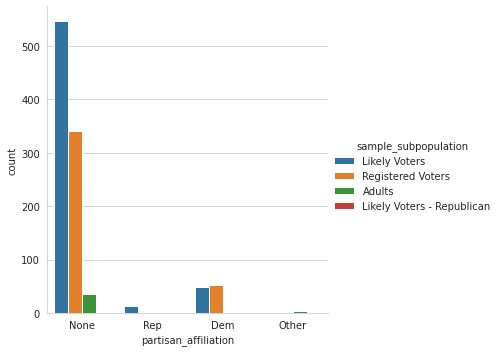

In [198]:
sns.catplot(data=poll_data, x='partisan_affiliation', kind='count', hue='sample_subpopulation')

It can be seen from the graph that Republic party had very few affiliations and out of these, all of them were likely voters. We can understand from this that, in the regions were Republic party had affiliations, they were very strong.

Whereas, In the regions with democratic party affiliations, it had more amount of registered voters than likely voters. This may be because, Democratic party is more focussed in urban areas and some of them might not be interested in voting. We should see weather this affected the result. 

For this, let us create a new column named result and add the result to this column

In [199]:
def poll_result(count):
  obama, romney = count
  if obama > romney:
    return 'obama'
  elif obama < romney:
    return 'romney'
  else:
    return 'tie'

In [200]:
poll_data['result'] = poll_data[['Obama', 'Romney']].apply(poll_result, axis=1)

Now let us visualize the results.

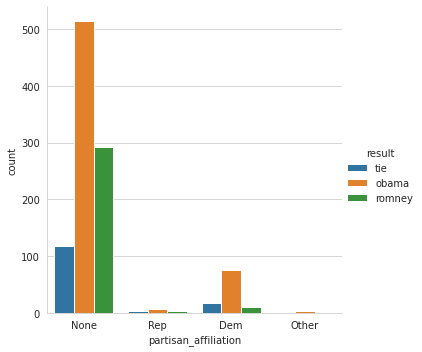

In [201]:
sns.catplot(data=poll_data, x='partisan_affiliation', kind='count', hue='result')

It is evident from the graph that regions with democratic affiliations followed the same trend by giving more votes to obama.

But the regions with Republic affiliation voted more for Democratic party candidate Obama, which inturn helped him win.

Even in regions with no affiliations, Obama had greater count.

Now let us see the total result stat

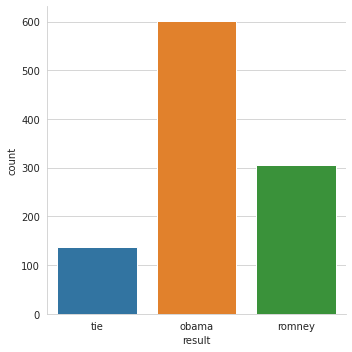

In [202]:
sns.catplot(data=poll_data, x='result', kind='count')

Obama had two times votes than romney

Lets now analyze on the end date now because this will tell us how close the numbers changed when it reached towards the election date.

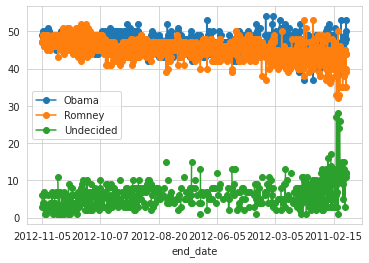

In [203]:
poll_data.plot(x='end_date', y=['Obama', 'Romney', 'Undecided'], marker='o')

The undecided votes reduced towards the election date and the contest between obama and romney grew stronger. which is veryy interesting.

Now let us see their vote share towards the election date.

In [204]:
poll_data['vote_difference'] = poll_data['Obama'] - poll_data['Romney']

In [205]:
from plotly import express as px

fig = px.line(data_frame=poll_data, x='end_date', y='vote_difference', width=800, height=300)
fig.show()

Here it can be seen that both romney and obama had almost equal share of votes towards the date of election compared to the total count within the whole dataset.

It can be also seen that during the months of octoberm november and december romney vote percentages were very high compared to obama.

In [206]:
index = poll_data[poll_data['end_date'] == '2011-10-03'].index
romney_peak_period = poll_data.loc[index[0]:index[0] + 10, :]

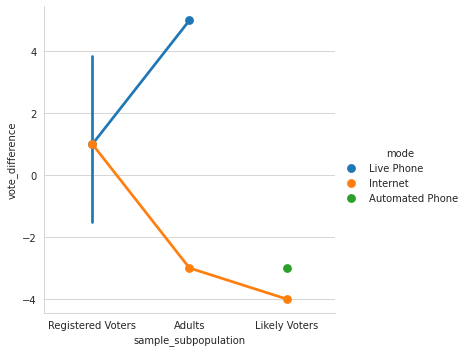

In [207]:
sns.catplot(data=romney_peak_period, y='vote_difference', x='sample_subpopulation', kind='point', hue='mode')

It can be observed that for adults and likely voters, most of them voted for romney when the poll was done through internet. Now let us see if poll through internet had favored romeny considering the  whole time.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

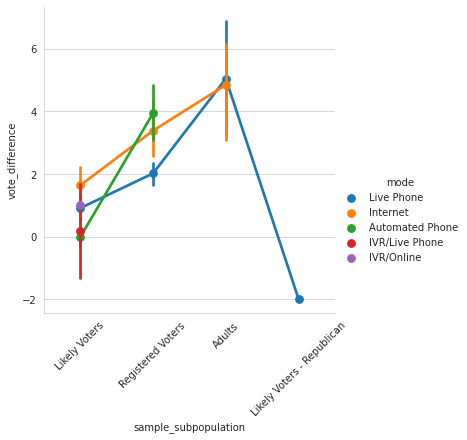

In [208]:
sns.catplot(data=poll_data, y='vote_difference', x='sample_subpopulation', kind='point', hue='mode')
plt.xticks(rotation=45)

It could be seen that internet mode haven't favored romney in anyway. It was only during that period romney had higher votes. This could be anything to do with the news during that time.

The debate dates during the elections were on October 3, 16 and 22 of 2012. Now let us see the changes before and after the debates.

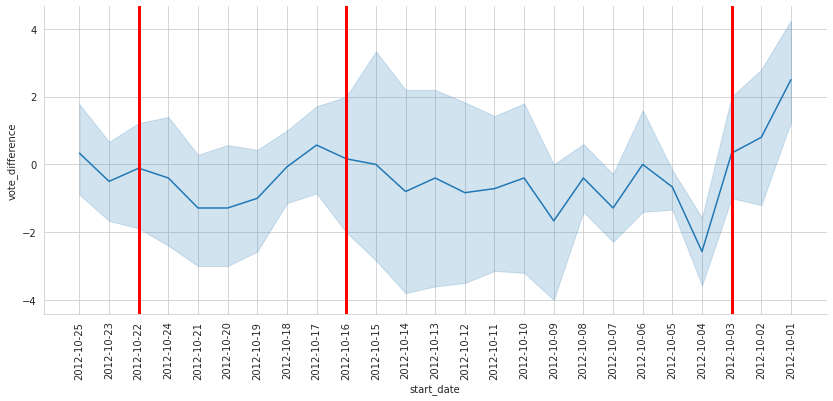

In [209]:
fig = sns.relplot(data=between_debate, x='start_date', y='vote_difference', aspect=70/30, kind='line')
fig.axes[0][0].axvline('2012-10-03', lw=3, color='red')
fig.axes[0][0].axvline('2012-10-16', lw=3, color='red')
fig.axes[0][0].axvline('2012-10-22', lw=3, color='red')
plt.xticks(rotation=90)
plt.show()

After the first debate, romney got lot of votes compared to obama. But after the second debate, more votes were for obama. The results were almost same for both obama and romney after third debate.